## Analítica Predictiva 2018-1 - Trabajo Final  

Presentado por:  
  
**Mario Fernando Reyes Ojeda**  
mareyeso@unal.edu.co


El trabajo propuesto fue desarrollado de acuerdo a los requisitos establecidos con el dataset **Polish Companies Bankruptcy** disponible en el repositorio de datos para Machine Learning de la Universidad de Carolina, Irvine. Este conjunto de datos hace parte de la coleccion relacionada a las categorias *Clasificación* y *Business*.

Para mayores detalles del dataset se puede referir a su [pagina][1] en el repositorio de UCI.

[1]:https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

### Definición del Problema en Terminos de Negocio

La previsión de bancarota se considera un tópico importante en la toma de decisiones económicas no solo por ser un mecanismo que previene los impactos y consecuencias sobre los colaboradores, inversores o stakeholders de una empresa, sino tambien porque permite identificar diversos escenarios que son observados por distintos actores (legisladores, entidades de control, organizaciones, etc.) externos para inferir comportamientos económicos y tomar decisiones de alto nivel respecto a la economía de una región o país.

Coherente a esto, resulta relevante analizar la dimensión operativa y financiera de un conjunto de empresas respecto a hechos historicos sobre lineas de tiempo, de tal manera que permitan identificar umbrales de riesgo sobre las operaciones económicas que pueden afectar su estabilidad (bancarota) y preever hechos que puedan generar repercusiones en la productividad de un sector.

###  Definición del Problema en Terminos de Datos

El conjunto de datos **Polish Companies Bankruptcy** esta compuesto por 43405 registros, cada registro representa el estado financiero de una empresa a traves de 64 variables numéricas relacionadas a distintos indicadores financieros y una variable categórica que define su bancarota dentro de un tiempo determinado. 

El tiempo de previsión de bancarota es definido dentro del rango 2007 y 2013 de acuerdo a la siguiente regla:
- Para los registros disponibles desde el primer año (2007) la previsión de bancarota dentro de 5 años
- Para los registros disponibles desde el primer año (2008) la previsión de bancarota dentro de 4 años
- Para los registros disponibles desde el primer año (2009) la previsión de bancarota dentro de 3 años
- Para los registros disponibles desde el primer año (2010) la previsión de bancarota dentro de 2 años
- Para los registros disponibles desde el primer año (2011) la previsión de bancarota dentro de 1 años

De acuerdo a la anterior descripción los datos estan particionados en cinco diferentes archivos en formato **arff**. Las variables se describen a continuacion:

- X1 Beneficio neto / activos totales
- X2 pasivos totales / activos totales
- X3 capital de trabajo / activos totales
- X4 activos corrientes / pasivos a corto plazo
- X5 [(efectivo + valores a corto plazo + cuentas por cobrar - pasivos a corto plazo) / (gastos de funcionamiento - depreciación)] * 365
- X6 ganancias retenidas / activos totales
- X7 EBIT / activos totales
- X8 valor contable del capital / pasivo total
- X9 ventas / activos totales
- X10 equity / total assets
- X11 (ganancia bruta + partidas extraordinarias + gastos financieros) / activos totales
- X12 Ganancia bruta / pasivos a corto plazo
- X13 (ganancia bruta + depreciación) / ventas
- X14 (beneficio bruto + interés) / activos totales
- X15 (pasivo total * 365) / (ganancia bruta + depreciación)
- X16 (beneficio bruto + depreciación) / pasivo total
- X17 activos totales / pasivos totales
- X18 Ganancia bruta / activos totales
- X19 ganancia bruta / ventas
- X20 (inventario * 365) / ventas
- X21 ventas (n) / ventas (n-1)
- X22 Beneficio en actividades operativas / activos totales
- X23 Ganancia / ventas netas 
- X24 Ganancia bruta (en 3 años) / activos totales
- X25 (capital social - capital social) / activos totales
- X26 (beneficio neto + depreciación) / pasivo total
- X27 Beneficio en actividades de operación / gastos financieros
- X28 capital de trabajo / activos fijos
- X29 logaritmo de los activos totales
- X30 (pasivo total - efectivo) / ventas
- X31 (beneficio bruto + interés) / ventas
- X32 (pasivo corriente * 365) / costo de los productos vendidos
- X33 gastos operativos / pasivos a corto plazo
- X34 gastos operativos / pasivos totales
- X35 Beneficio en ventas / activos totales
- X36 ventas totales / activos totales
- X37 (activo circulante - inventarios) / pasivo a largo plazo
- X38 capital constante / activos totales
- X39 Beneficio en ventas / ventas
- X40 (activo circulante - inventario - cuentas por cobrar) / pasivos a corto plazo
- X41 pasivo total / ((ganancia en actividades operativas + depreciación) * (12/365))
- X42 Beneficio en actividades de operación / ventas
- X43 giro por cobrar + rotación de inventario en días
- X44 (cuentas por cobrar * 365) / ventas
- X45 Beneficio neto / inventario 
- X46 (activo circulante - inventario) / pasivo a corto plazo
- X47 (inventario * 365) / costo de los productos vendidos
- X48 EBITDA (ganancia en actividades operativas - depreciación) / activos totales
- X49 EBITDA (ganancia en actividades operativas - depreciación) / ventas
- X50 activos corrientes / pasivos totales
- X51 pasivos a corto plazo / activos totales
- X52 (pasivo a corto plazo * 365) / costo de los productos vendidos)
- X53 capital / activos fijos
- X54 capital constante / activos fijos
- X55 Capital de trabajo
- X56 (ventas - costo de los productos vendidos) / ventas
- X57 (activo circulante - inventario - pasivo a corto plazo) / (ventas - ganancia bruta - depreciación)
- X58 costos totales / ventas totales
- X59 pasivo a largo plazo / patrimonio
- X60 ventas / inventario
- X61 ventas / cuentas por cobrar
- X62 (pasivos a corto plazo * 365) / ventas
- X63 Ventas / pasivos a corto plazo
- X64 Ventas / activos fijos
- X65 **Bancarota**

El problema respecto a los datos es establecer si una empresa entrará en bancarota (1, 0) a partir de sus indicadores financieros en la prevision de tiempo de acuerdo al año al que pertenece el registro (estado financiero) de la empresa.

#### Exploración de los Datos

In [1]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import *
from sklearn.metrics import *

Los siguientes comandos facilitan la descarga de los datos.

In [ ]:
!mkdir 'data'
!wget -q 'https://archive.ics.uci.edu/ml/machine-learning-databases/00365/data.zip'
!unzip -q 'data.zip' -d './data'
!rm 'data.zip'

Como anteriormente se describió el tipo de archivo de los datos es **.arff**, por tanto es necesario poder convertirlos a **csv** para facilitar su manejo con la libreria pandas. La siguiente función es un pequeño parser entre este tipo de formatos.

In [ ]:
def to_csv(content):
    data = False
    header = ""
    new_content = list()
    for line in content:
        if not data:
            if "@attribute" in line:
                attr = line.split()
                column_name = attr[attr.index("@attribute")+1]
                header = header + column_name + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                new_content.append(header)
        else:
            new_content.append(line)
    return new_content

files = [arff for arff in os.listdir('./data') if arff.endswith(".arff")]

for file in files:
    with open(("data/"+ file) , "r") as in_file:
        content = in_file.readlines()
        name, ext = os.path.splitext(in_file.name)
        new = to_csv(content)
        with open(name +".csv", "w") as out_file:
            out_file.writelines(new)

Como los archivos **arff** no contienen el nombre de cada variable en el header como propuesta personal se creó un archivo de texto con las etiquetas para  facilitar y automatizar la operación de las etiquetas con la colección de datos. El siguiente comando descarga el archivo desde un almacenamiento píblico propio. Adicionalmente se realiza una transformación sobre la cadena para evitar espacios innecesarios. 

In [ ]:
!wget -q 'https://storage.googleapis.com/mareyesobu/data/polishfeatures_dataset.txt' -O 'variables.txt'

In [13]:
variables = list()
with open('variables.txt', 'r') as var_file:
    content = var_file.readlines()
    variables = [(variable.strip().replace(" + ", "+").replace(" / ", "/").replace(" * ","*")
                  .replace(" - ","-").replace(" ", "_")) for variable in content]

Se utilizará los DataFrames de Pandas libreria de Python para almacenar, limpiar y transformar los datos. Los datos son leidos desde los archivos **csv**.

Previamente se habia descrito que los datos han sido particionados de acuerdo al año de previsión de bancarota en cinco distintos archivos. Como parte de este trabajo se formula la hipotesis de utilizar el año de previsión como una variable categórica que se añada a cada registro de acuerdo a la colección a la cual pertenece. Se intenta que los modelos puedan dentro de su aprendizaje utilizar esta variable para determinar respecto a los otros valores de esta variable *time_to_bankruptcy* la clase.

Finalmente los datos se concatenan.

In [14]:
dataframes = list()
files = sorted([file for file in os.listdir('./data') if file.endswith(".csv")])
years = ['60', '48', '36', '24', '12']

for index, file in enumerate(files):
    filepath = 'data/%s' %(file, )
    dataframe = pd.read_csv(filepath, low_memory=False)
    dataframe.columns = variables
    
    year_feature = pd.Series(np.repeat([years[index]], [len(dataframe)]))
    dataframe['time_to_bankruptcy'] = year_feature 
    
    dataframes.append(dataframe)

variables.append('time_to_bankruptcy')
data = pd.concat(dataframes, ignore_index=True)

In [15]:
size_data = data.shape
print(size_data)

(43405, 66)


#### Limpieza de los Datos  
  
Para realizar el proceso de exploración forma efectiva se realiza un proceso de limpieza de datos coherente a la descripción del repositorio de UCI donde se detalla que el dataset contiene datos perdidos. Previamente observando los datos se identifica que el caracter **?** representa los datos perdidos.

In [16]:
variables_change = variables[:-2]
for v in data:
    data[v] = data[v].replace('?', np.nan)

In [17]:
size_start = len(data)
data = data.dropna()
size_clean = len(data)

lostdata_flag = False 

if size_start != size_clean:
    lostdata_flag = True
    print("Incompletos ", (size_start - size_clean))

size_start = size_clean
data = data.drop_duplicates()
size_clean = len(data)

duplicated_flag = False
if size_start != size_clean:
    duplicated_flag = True
    print("Duplicados ", (size_start - size_clean))    

message = "Los datos se encontraron completos"

if lostdata_flag or duplicated_flag:
    message = "Se realizo limpieza sobre la colección de datos, el nuevo conjunto es de %s observaciones" %(size_clean, )

print(message)


Incompletos  23438
Duplicados  230
Se realizo limpieza sobre la colección de datos, el nuevo conjunto es de 19737 observaciones


#### Ajustando los tipos de datos sobre el DataFrame  
  
Como parte de la lectura de los archivos **csv** Pandas establece el tipo de las variables como objetos, de acuerdo a eso se establece los tipos de datos numericos para las 64 variables iniciales y categórico para *time_to_bankruptcy* y la clase.

In [18]:
data['time_to_bankruptcy'] = data['time_to_bankruptcy'].astype('category')
data['bankruptcy'] = data['bankruptcy'].astype('category')

for v in variables_change:
    data[v] = pd.to_numeric(data[v])

In [19]:
# Validando los nuevos tipos de variables
data.dtypes

net_profit/total_assets                                                                                     float64
total_liabilities/total_assets                                                                              float64
working_capital/total_assets                                                                                float64
current_assets/short-term_liabilities                                                                       float64
[(cash+short-term_securities+receivables-short-term_liabilities)/(operating_expenses-depreciation)]*365     float64
retained_earnings/total_assets                                                                              float64
EBIT/total_assets                                                                                           float64
book_value_of_equity/total_liabilities                                                                      float64
sales/total_assets                                                      

#### Análisis de los Datos  
  
A continuación se realiza un analisis de las variables que conforman el conjunto de datos a fin de poder conocer su escala, distribución y balance.

In [20]:
data.describe()

,net_profit/total_assets,total_liabilities/total_assets,working_capital/total_assets,current_assets/short-term_liabilities,[(cash+short-term_securities+receivables-short-term_liabilities)/(operating_expenses-depreciation)]*365,retained_earnings/total_assets,EBIT/total_assets,book_value_of_equity/total_liabilities,sales/total_assets,equity/total_assets,...,working_capital,(sales-cost_of_products_sold)/sales,(current_assets-inventory-short-term_liabilities)/(sales-gross_profit-depreciation),total_costs_/total_sales,long-term_liabilities/equity,sales/inventory,sales/receivables,(short-term_liabilities_*365)/sales,sales/short-term_liabilities,sales/fixed_assets
count,19737.000000,19737.000000,19737.000000,19737.000000,1.973700e+04,19737.000000,19737.000000,19737.000000,19737.000000,19737.000000,...,1.973700e+04,19737.000000,19737.000000,19737.000000,19737.000000,19737.000000,19737.000000,1.973700e+04,19737.000000,19737.000000
mean,0.054856,0.531074,0.135235,2.005011,-6.476261e+02,0.071515,0.035440,1.454743,1.447554,0.441983,...,7.514733e+03,-0.673257,-0.030274,1.684922,1.397008,52.310538,10.112438,2.137511e+02,5.978577,10.122322
std,0.638970,3.085885,0.257935,5.232963,8.629980e+04,4.501910,3.687004,2.390331,1.118815,2.436122,...,5.938275e+04,73.031731,14.176728,73.050308,59.678318,1072.463143,24.509381,9.594210e+03,8.066038,198.246499
min,-5.965500,-430.870000,-6.459000,0.019163,-1.190300e+07,-117.420000,-517.480000,-1.025300,0.000469,-7.552500,...,-1.118500e+06,-8534.600000,-1667.300000,-1.046300,-284.380000,0.003985,0.000494,7.179600e-01,0.000000,0.000000
25%,0.004386,0.361390,-0.000148,0.999650,-5.809800e+01,0.000000,0.006761,0.394930,1.012500,0.276920,...,9.599300e-01,0.012190,0.015354,0.894100,0.042657,5.504600,4.673400,5.246000e+01,2.990900,1.871800
50%,0.042403,0.530920,0.135780,1.389900,-1.400800e+01,0.000000,0.051236,0.835290,1.101600,0.442740,...,1.502100e+03,0.049998,0.111410,0.954930,0.179510,9.249200,6.666100,8.154000e+01,4.476100,3.297400
75%,0.105760,0.704010,0.289290,2.123100,2.465100e+01,0.141320,0.123710,1.687700,1.617300,0.611640,...,6.354800e+03,0.111970,0.249900,0.991760,0.537660,17.885000,10.000000,1.219900e+02,6.956700,5.993700
max,87.459000,8.552500,0.993960,508.860000,9.909000e+05,543.250000,2.319800,115.190000,71.555000,339.850000,...,4.398400e+06,2.002300,527.220000,8536.800000,7617.300000,125170.000000,1451.500000,1.301600e+06,508.380000,18820.000000


#### Boxplots de Variables  
  
A fin de poder observar graficamente las variables a traves un diagrama de caja y bigotes se realiza un filtro previo sobre los datos para no observar los outliers que a través de los valores maximos descritos a través del anterior tabla son evidentes.

In [22]:
filt_df = data.loc[:, data.columns != 'bankruptcy']
filt_df = filt_df.loc[:, filt_df.columns != 'time_to_bankruptcy']

low = .05
high = .95
quant_df = filt_df.quantile([low, high])

filt_df = filt_df.apply(lambda x: x[(x>=quant_df.loc[low,x.name]) & 
                                    (x<=quant_df.loc[high,x.name])], axis=0)


filt_df = pd.concat([filt_df, data.loc[:,'time_to_bankruptcy']], axis=1)
filt_df = pd.concat([filt_df, data.loc[:,'bankruptcy']], axis=1)
data_df = filt_df

#### Boxplot de Features

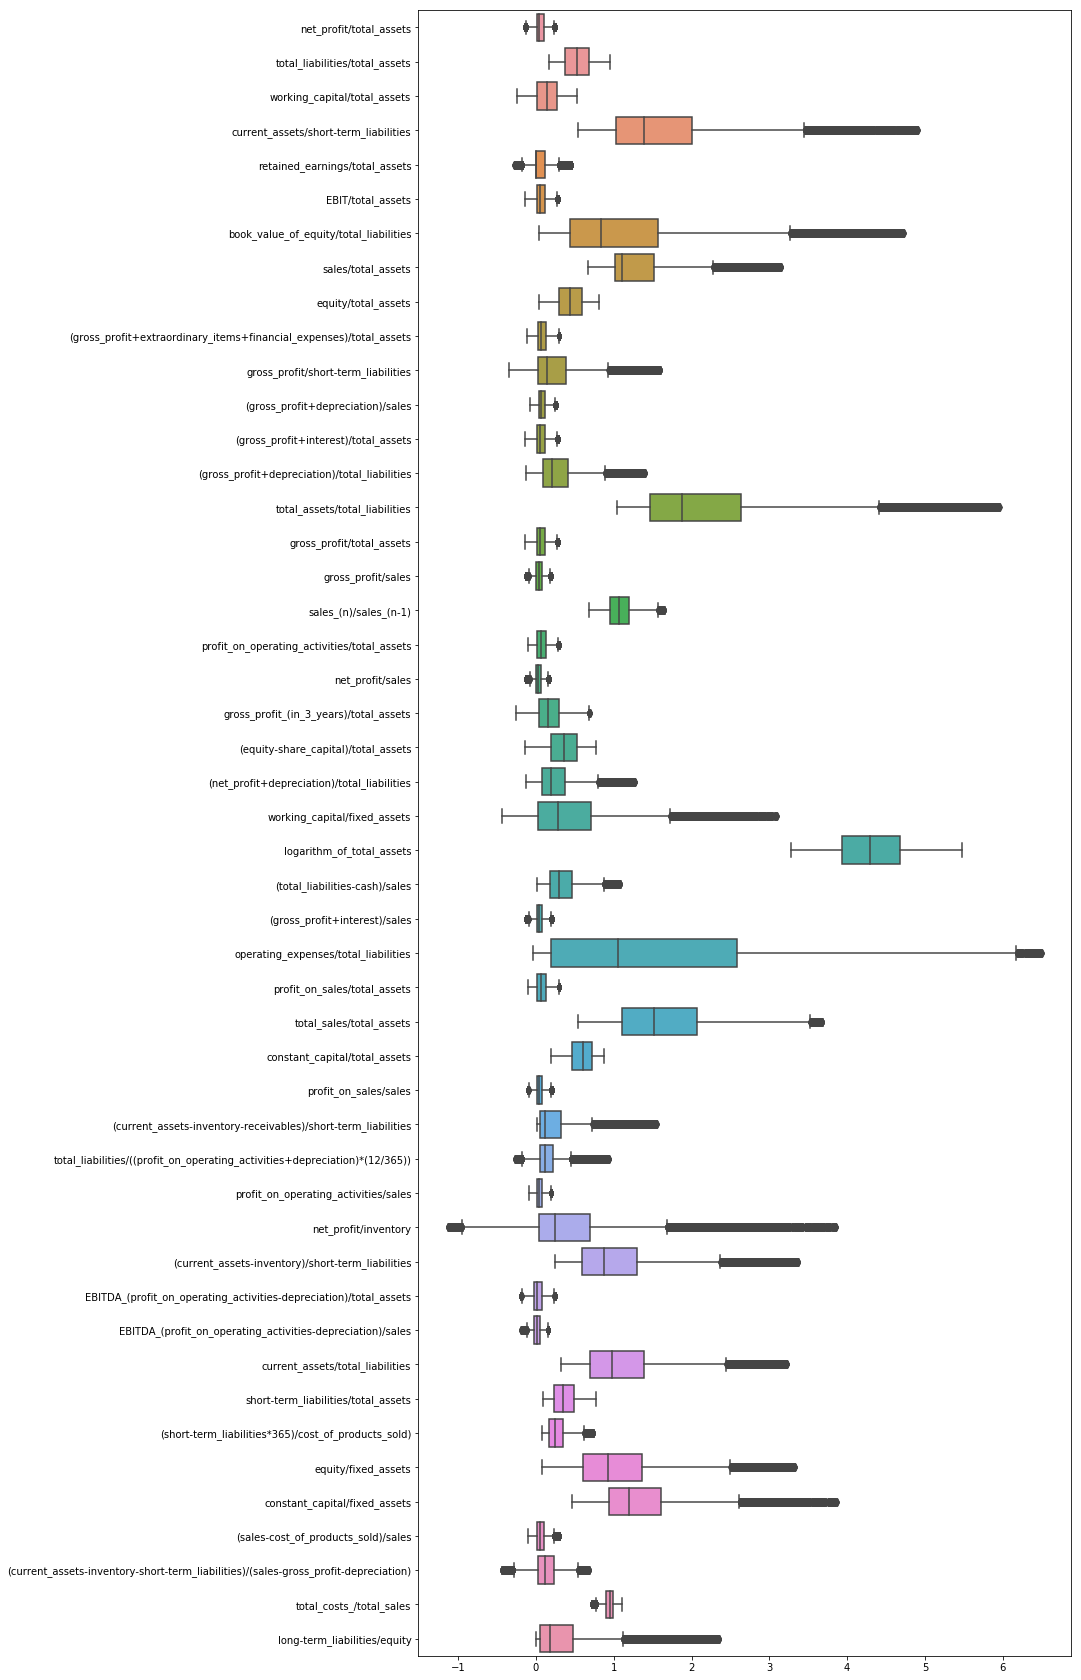

In [23]:
%matplotlib inline
a4_dims = (11.7, 30.27)
fig, ax = plt.subplots(figsize=a4_dims)

medium_variables = list()

for f in data_df.loc[:, :'sales/fixed_assets']:
     if data_df[f].max() >= 10:
            medium_variables.append(f)

small_df = data_df.loc[:, data_df.columns != medium_variables[0]]
for i in range(1,len(medium_variables)):
     small_df = small_df.loc[:, small_df.columns != medium_variables[i]]

small_df = small_df.loc[:, small_df.columns != 'time_to_bankruptcy']
small_df = small_df.loc[:, small_df.columns != 'bankruptcy']

sns.boxplot(data=small_df, orient='h')

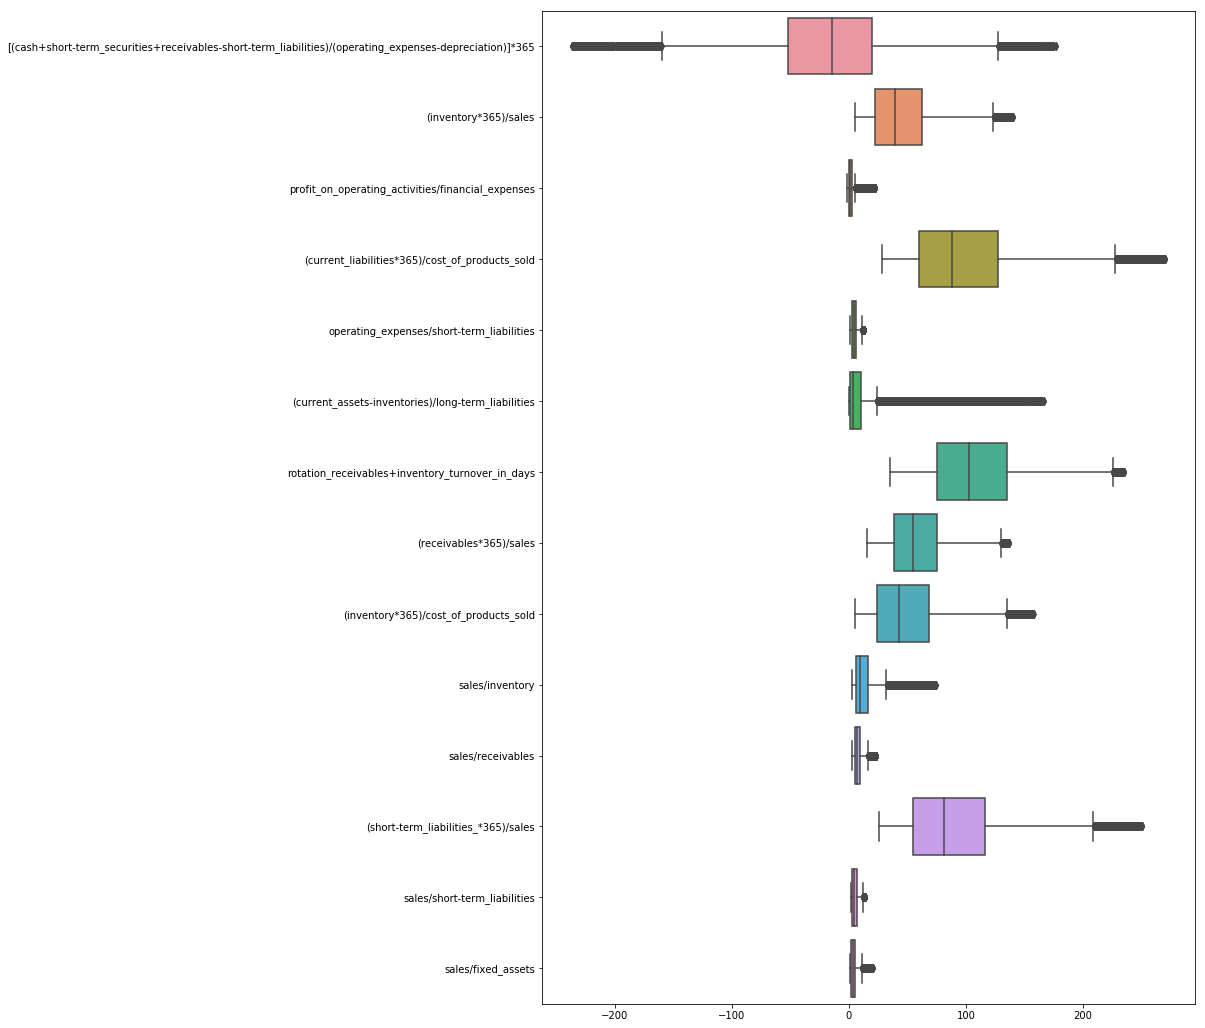

In [24]:
big_variables = list()
medium_df = data_df[medium_variables]

for j in medium_df:
    if medium_df[j].max() > 1000:
        big_variables.append(j)
        medium_df.pop(j)
  
a4_dims = (11.7, 18.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=medium_df, orient='h')

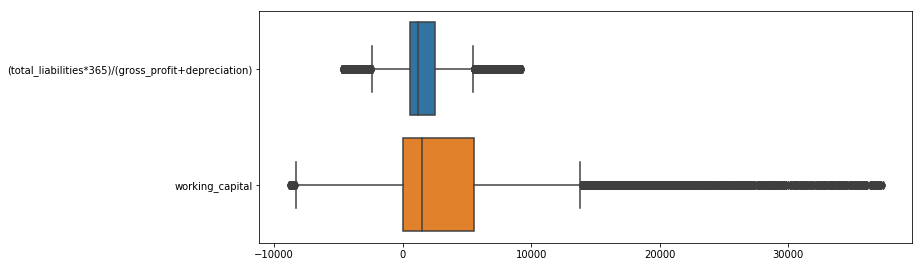

In [25]:
big_df = data_df[big_variables]
a4_dims = (11.7, 4.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(data=big_df, orient='h')

#### Variables Categoricas

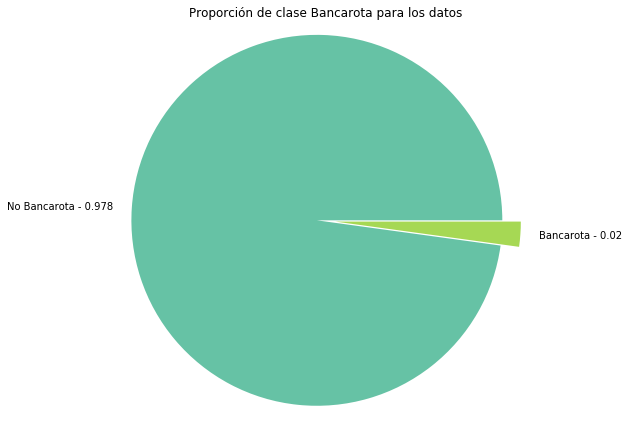

In [26]:
f = data_df['bankruptcy'].value_counts()
proportion_bankruptcy = f / data_df.shape[0]

a4_dims = (7.7, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)

labels = ['No Bancarota - %.3f' %(proportion_bankruptcy[0]), 'Bancarota - %.2f' %(proportion_bankruptcy[1])]
explode = (0, 0.1)
cs = plt.cm.Set2(np.arange(2)/2.)

patches, texts = plt.pie(f, explode=explode, labels=labels, radius=1, colors=cs)
plt.axis('equal')
plt.title("Proporción de clase Bancarota para los datos")
plt.show()

In [27]:
proportion_bankruptcy

0    0.978264
1    0.021736
Name: bankruptcy, dtype: float64

En el gráfico se puede evidenciar que el conjunto de datos respecto a la clase bancarota se encuentra desbalanceado, esto sugiere tener absoluto cuidado en el proceso de selección de muestras para el proceso de entrenamiento, validacion y prueba.

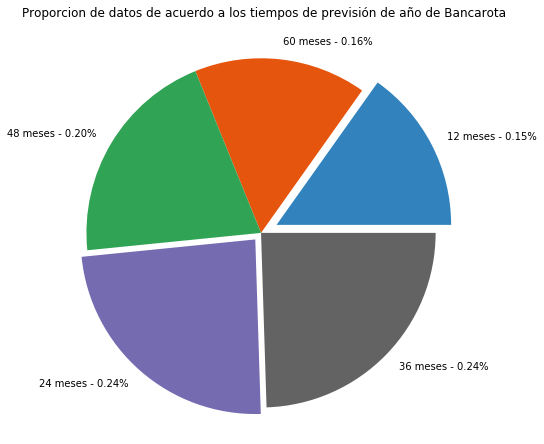

In [28]:
labels = ['36 meses', '24 meses', '48 meses', '60 meses', '12 meses']
labels.reverse()

feq_years = data_df['time_to_bankruptcy'].value_counts()
proportion_years = (feq_years / data_df.shape[0]).tolist()
proportion_years.reverse()

for i in range(0, len(proportion_years)):
    labels[i] = labels[i] + " - %.2f" %(proportion_years[i], ) + "%"

a4_dims = (7.7, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)
explode = (0.1, 0, 0, 0.05, 0)
cs = plt.cm.tab20c(np.arange(5)/5.)
patches, texts = plt.pie(proportion_years, explode=explode, labels=labels, radius=1, colors=cs)
                         
plt.title('Proporcion de datos de acuerdo a los tiempos de previsión de año de Bancarota \n')
plt.gca().axis("equal")
plt.show()

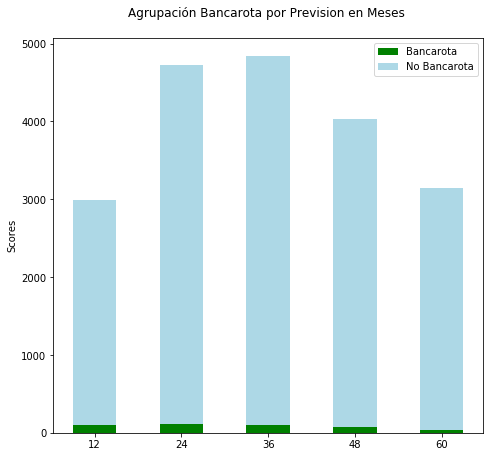

In [31]:
years = ('12', '24', '36', '48', '60')
bankruptcy = list()
no_bankruptcy = list()

grouped = data_df.groupby(['time_to_bankruptcy', 'bankruptcy'])['bankruptcy'].count()

for i in range(0, len(grouped), 2):
    bankruptcy.append(grouped[i])
    no_bankruptcy.append(grouped[i+1])  

a4_dims = (7.7, 7.27)
fig, ax = plt.subplots(figsize=a4_dims)
width = 0.5
ind = np.arange(len(years))

p1 = plt.bar(ind, no_bankruptcy, width, color='green')
p2 = plt.bar(ind, bankruptcy, width,
             bottom=no_bankruptcy, color='lightblue')

plt.ylabel('Scores')
plt.title('Agrupación Bancarota por Prevision en Meses \n')
plt.xticks(ind, years)
plt.legend((p1[0], p2[0]), ('Bancarota', 'No Bancarota'))

plt.show()

#### Controlando Outliers  
  
Con base en el anterior análisis de las variables que conforman el conjunto de datos se establece realizar una transformacion sobre los valores de cada columna que supera los limites adecuados de la desviación estandar. A traves del método clip de pandas se ejecuta esta tranformacion sobre los datos con excepción de las variables categóricas.

In [33]:
data_df = pd.DataFrame()

for f in data.loc[:,:'sales/fixed_assets']:
    std = data[f].std()
    data_df[f] = data[f].clip(-3*std, 3*std)

data_df = pd.concat([data_df, data.loc[:,'time_to_bankruptcy']], axis=1)
data_df = pd.concat([data_df, data.loc[:,'bankruptcy']], axis=1)

## Preparación de Datos

A traves de las siguientes cuatro tecnicas se intenta establecer un modelo de de aprendizaje para la previsión de bancarota para empresas de polonia. Las tecnicas seleccionadas se caracterizan por ser algoritmos de aprendizaje supervisado que pueden determinar una clasificación a traves de un proceso de entrenamiento previo.

De acuerdo a lo anteriormente descrito los metodos utilizados requieren conjuntos de datos disimiles durante su
fase de entrenamiento, validación y prueba. Para facilitar el proceso se plantea construir una función que genere
los conjuntos de entrenamiento y prueba cada vez que se requiera. La función se basa en el metodo kfolds estratificado debido a que los datos se encuentran desbalanceados con relación a la etiqueta de bancarota como en la sección de exploración de datos fue descrito. La funcion es parametrizable, se puede determinar el numero de folds y la columna que representa la clase.

In [ ]:
def get_sets(data, label_class, num_folds=10):
    
    folds = dict()
    skf = StratifiedKFold(n_splits=num_folds)
    x = data.loc[:, data.columns != label_class]
    y = data[label_class]
    
    fold = 1
    for train_index, test_index in skf.split(x, y):
        x_train, x_test = x.reindex(train_index), x.reindex(test_index)
        y_train, y_test = y.reindex(train_index), y.reindex(test_index)
        
        folds[str(fold)] = {"train": [x_train, y_train], "test": [x_test, y_test]}
        fold +=1
    
    return folds

Para la construcción de los modelos se debe indicar sobre el dataframe que estamos utilizando que la variable que se añadió **time_to_bankruptcy** debe ser considerada como un factor. De forma complementaria para evitar errrores de indexación se reinician los indices sobre el dataframe despues del proceso de limpieza y transformación realizado previamente.

In [ ]:
enc = LabelEncoder()
data_df['time_to_bankruptcy'] = enc.fit_transform(data_df['time_to_bankruptcy'])
data_df = data_df.reset_index()

## Modelado

### Método 1: Regresión Logistica

La Regresión Logística es una técnica estadística que permite estimar la relación existente entre una variable dependiente no métrica, en particular dicotómica y un conjunto de variables independientes métricas o no métricas.

La variable dependiente o respuesta no es continua, sino discreta (generalmente toma valores 1,0). Las variables explicativas pueden ser cuantitativas o cualitativas; y la ecuación del modelo no es una función lineal de partida, sino exponencial, este tipo de modelos son utiles en frecuentes situaciones en que la respuesta puede tomar únicamente dos valores: 1, presencia (con probabilidad p); y 0, ausencia (con probabilidad 1-p).

In [ ]:
data_ml = get_sets(data_df, 'bankruptcy', 10)
mse = list()

for f in data_ml:
    print("Procesando fold %s" % f)
    train = data_ml[f]['train']
    test = data_ml[f]['test']
    
    logreg = LogisticRegression()
    logreg.fit(train[0], train[1])

    pred = logreg.predict(test[0])
    mse.append(mean_squared_error(test[1], pred))

print(pd.DataFrame(mse).mean())

### Método 2: Árboles de Decisión

Los árboles de decisión son modelos que tienen estructuras para representar conjuntos de decisiones. Estas decisiones generan reglas para la clasificación de un conjunto de datos.

Existen métodos específicos de árboles de decisión que incluyen clasificación y regresión. De manera fundamental los árboles de decisión son representaciones gráficas de la lógica de las probabilidades aplicada a las alternativas de decisión. La base (trunk) del árbol es el punto de partida de la decisión. Las ramas de éste comienzan con la probabilidad del primer acontecimiento. 

La probabilidad de cada situacion produce dos o más efectos posibles, algunos de los cuales conducen a otros eventos de probabilidad y a puntos de decisión anidados. Los valores en los que se fijan las ramas del árbol provienen de un análisis detallado para establecer un criterio para la toma de decisión.

In [ ]:
mse = list()
data_ml = get_sets(data_df, 'bankruptcy', 10)

for f in data_ml:
    print("Procesando fold %s" % f)
    train = data_ml[f]['train']
    test = data_ml[f]['test']
    
    clf = DecisionTreeClassifier()
    clf.fit(train[0], train[1])
    
    pred = clf.predict(test[0])
    mse.append(mean_squared_error(test[1], pred))

print(pd.DataFrame(mse).mean())

### Método 3: Redes Neuronales Artificiales

La técnica basada en redes neuronales artificiales se basa en la neurona como unidad inteligente capaz de procesar y aprender de forma análoga a como sucede en el cerebro humano. Una red neuronal artificial se basa sobre el trabajo conjunto de numerosas neuornas que interactuan para efectuar una acción.

En una red neuronal artificial las unidades de procesamiento se organizan en capas. Comunmente una red esta compuesta por tres partes: una capa con unidades que representan los campos de entrada, una o varias capas ocultas y una capa de salida con una unidad o unidades que representa el campo o los campos de destino. Las unidades se conectan con fuerzas de conexión variables consideradas pesos que son inicializados de forma aleatoria. Los datos de entrada ingresan a traves de la primera capa y los valores de procesamiento y cálculo se propagan desde cada neurona hasta cada neurona de la capa siguiente. al final, se envía un resultado desde la capa de salida.

La red aprende examinando los registros individuales, generando una predicción para cada registro y realizando ajustes a las ponderaciones cuando realiza una predicción incorrecta. Este proceso se repite muchas veces y la red sigue mejorando sus predicciones hasta haber alcanzado uno o varios criterios de parada.

In [ ]:
mse = list()
score = list()
data_ml = get_sets(data_df, 'bankruptcy', 10)

for f in data_ml:
    print("Procesando fold %s" % f)
    train = data_ml[f]['train']
    test = data_ml[f]['test']
    
    nna = MLPClassifier(alpha=0.01)
    nna.fit(train[0], train[1])
    
    pred = nna.predict(test[0])
    mse.append(mean_squared_error(test[1], pred))
    score.append(nna.score(test[0], test[1]))

print(pd.DataFrame(mse).mean())
print(pd.DataFrame(score).mean())

### Método 4: Maquina de Soporte Vectorial

Las maquinas de soporte vectorial hacen parte de las técnicas de aprendizaje supervisado desarrollada en 1995 por
Vapnik y Cortés en AT&T durante el año 1995. Las maquinas de soporte vectorial se pueden utilizar tanto para problemas de clasificación como tambien para regresión.

La naturaleza del método se basa en la idea de transformar o proyectar un conjunto de datos pertenecientes a una dimensión n dada hacia un espacio de dimensión superior aplicando una función kernel. A partir del nuevo espacio creado los datos se operaran como si se tratase de un problema de tipo lineal resolviendo el problema sin considerar la dimensionalidad de los datos.

La idea detrás de las SVM es que a partir de unos inputs de entrada al modelo se etiquetan las clases y se entrena una SVM construyendo un modelo que sea capaz de predecir la clase de los nuevos datos que se introduzcan al modelo. La SVM representa en un eje de coordenadas los vectores de entrenamiento, separando las clases por un espacio lo más grande posible. Cuando nuevos datos son introducidos al modelo, estos se colocan sobre el mismo eje y en función de la cercanía de los grupos antes separados, los cuáles serán clasificados en una u otra clase.

In [ ]:
mse = list()
score = list()
data_ml = get_sets(data_df, 'bankruptcy', 10)

for f in data_ml:
    print("Procesando fold %s" % f)
    train = data_ml[f]['train']
    test = data_ml[f]['test']
    
    svcm = SVC()
    svcm.fit(train[0], train[1])
    
    pred = svcm.predict(test[0])
    mse.append(mean_squared_error(test[1], pred))
    score.append(svcm.score(test[0], test[1]))

print(pd.DataFrame(mse).mean())
print(pd.DataFrame(score).mean())

### Evaluacion y Comparación de Modelos